# Spotify Song Clustering

## Problem Scenario:
The customer always looks forward to specialized treatment, whether shopping on an e-commerce website or watching Netflix. The customer desires content that aligns with their preferences. To maintain customer engagement, companies must consistently provide the most relevant information.
Starting with Spotify, a Swedish audio streaming and media service provider, boasts over 456 million active monthly users, including more than 195 million paid subscribers as of September 2022. The company aims to create cohorts of different songs to enhance song recommendations. These cohorts will be based on various relevant features, ensuring that each group contains similar types of songs.

## Problem Objective: 
As a data scientist, you should perform exploratory data analysis and cluster analysis to create cohorts of songs. The goal is to better understand the various factors that create a cohort of songs.

## Data Description: 
The dataset comprises information from Spotify's API regarding all albums by the Rolling Stones available on Spotify. It's crucial to highlight that each song possesses a unique ID.

## Steps to Perform:

1. Initial data inspection and data cleaning:
a. Examine the data initially to identify duplicates, missing values, irrelevant entries, or outliers. Check for any instances of erroneous entries and rectify them as needed

2. Refine the data for further processing based on your findings

3. Perform exploratory data analysis and feature engineering
a. Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album
b. Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns
c. Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved
d. Provide insights on the significance of dimensionality reduction techniques. Share your ideas and elucidate your observations

4. Perform cluster analysis
a. Identify the right number of clusters
b. Use appropriate clustering algorithms
c. Define each cluster based on the features

In [62]:
!python -m ipykernel install --user --name=simpli-ml --display-name "Python (simpli-ml)"

Installed kernelspec simpli-ml in C:\Users\aayushim\AppData\Roaming\jupyter\kernels\simpli-ml


In [63]:
import sys
print(sys.executable)

c:\Python312\python.exe


In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [65]:
df = pd.read_csv("C:/Users/aayushim/Desktop/Aayushi/SIMPLI_Projects/Spotify_Song_Clustering/rolling_stones_spotify.csv")
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [66]:
df.shape

(1610, 18)

In [67]:
df.columns

Index(['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id',
       'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

In [68]:
df.nunique()

Unnamed: 0          1610
name                 954
album                 90
release_date          57
track_number          47
id                  1610
uri                 1610
acousticness         933
danceability         518
energy               511
instrumentalness    1134
liveness             757
loudness            1329
speechiness          655
tempo               1424
valence              701
popularity            69
duration_ms         1320
dtype: int64

### 1. Initial data inspection and data cleaning:
Examine the data initially to identify duplicates, missing values, irrelevant entries, or outliers. Check for any instances of erroneous entries and rectify them as needed

In [69]:
# Basic info and first few rows
info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [70]:
# Check for duplicates and missing values
duplicates = df.duplicated().sum()
missing_values = df.isnull().sum()

# Summary statistics for numerical columns
summary_stats = df.describe()

duplicates, missing_values, summary_stats

(np.int64(0),
 Unnamed: 0          0
 name                0
 album               0
 release_date        0
 track_number        0
 id                  0
 uri                 0
 acousticness        0
 danceability        0
 energy              0
 instrumentalness    0
 liveness            0
 loudness            0
 speechiness         0
 tempo               0
 valence             0
 popularity          0
 duration_ms         0
 dtype: int64,
         Unnamed: 0  track_number  acousticness  danceability       energy  \
 count  1610.000000   1610.000000   1610.000000   1610.000000  1610.000000   
 mean    804.500000      8.613665      0.250475      0.468860     0.792352   
 std     464.911282      6.560220      0.227397      0.141775     0.179886   
 min       0.000000      1.000000      0.000009      0.104000     0.141000   
 25%     402.250000      4.000000      0.058350      0.362250     0.674000   
 50%     804.500000      7.000000      0.183000      0.458000     0.848500   
 75%    120

Initial Data Inspection and Cleaning Summary:
- Total records: 1,610 songs
- No missing values across all columns.
- No duplicate records.

Unnecessary columns:
- Unnamed: 0 (index column from CSV export)
- id and uri (Spotify-specific identifiers, not useful for clustering)

### 2. Refine the data for further processing based on your findings

In [71]:
# Clean column names (strip spaces)
df.columns = df.columns.str.strip()

# Drop irrelevant columns
df_cleaned = df.drop(columns=["Unnamed: 0", "id", "uri"])

# Convert release_date to datetime
df_cleaned["release_date"] = pd.to_datetime(df_cleaned["release_date"], format='%Y-%m-%d', errors="coerce")

# Confirm changes
df_cleaned.info(), df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   acousticness      1610 non-null   float64       
 5   danceability      1610 non-null   float64       
 6   energy            1610 non-null   float64       
 7   instrumentalness  1610 non-null   float64       
 8   liveness          1610 non-null   float64       
 9   loudness          1610 non-null   float64       
 10  speechiness       1610 non-null   float64       
 11  tempo             1610 non-null   float64       
 12  valence           1610 non-null   float64       
 13  popularity        1610 non-null   int64         
 14  duration_ms       1610 n

(None,
                           name               album release_date  track_number  \
 0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10             1   
 1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10             2   
 2           Start Me Up - Live  Licked Live In NYC   2022-06-10             3   
 3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10             4   
 4            Don’t Stop - Live  Licked Live In NYC   2022-06-10             5   
 
    acousticness  danceability  energy  instrumentalness  liveness  loudness  \
 0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
 1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
 2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
 3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
 4        0.4000         0.303   0.969          0.055900     0.966    -5.098   
 
    speechiness  

### 3. Perform exploratory data analysis and feature engineering

a. Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album.

b. Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns.

c. Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved.

d. Provide insights on the significance of dimensionality reduction techniques. Share your ideas and elucidate your observations.

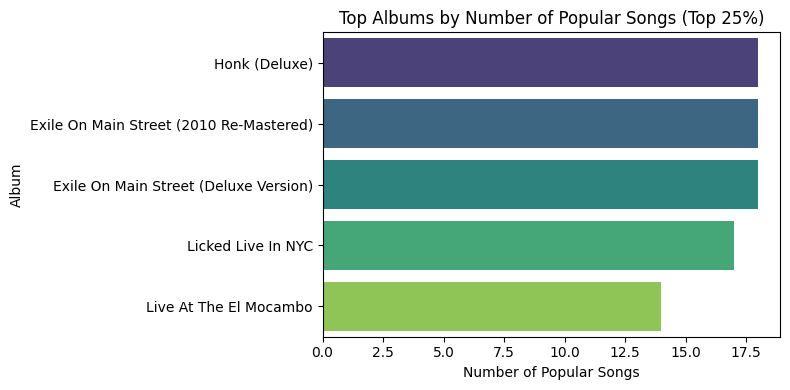

album
Honk (Deluxe)                              18
Exile On Main Street (2010 Re-Mastered)    18
Name: count, dtype: int64

In [72]:
# Determine popularity threshold (top 25%)
popularity_threshold = df_cleaned["popularity"].quantile(0.75)

# Filter popular songs
popular_songs = df_cleaned[df_cleaned["popularity"] >= popularity_threshold]

# Count popular songs per album
top_albums = popular_songs["album"].value_counts().head(5)

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(x=top_albums.values, y=top_albums.index, hue=top_albums.index, palette="viridis")
plt.title("Top Albums by Number of Popular Songs (Top 25%)")
plt.xlabel("Number of Popular Songs")
plt.ylabel("Album")
plt.tight_layout()
plt.show()

top_albums.head(2)

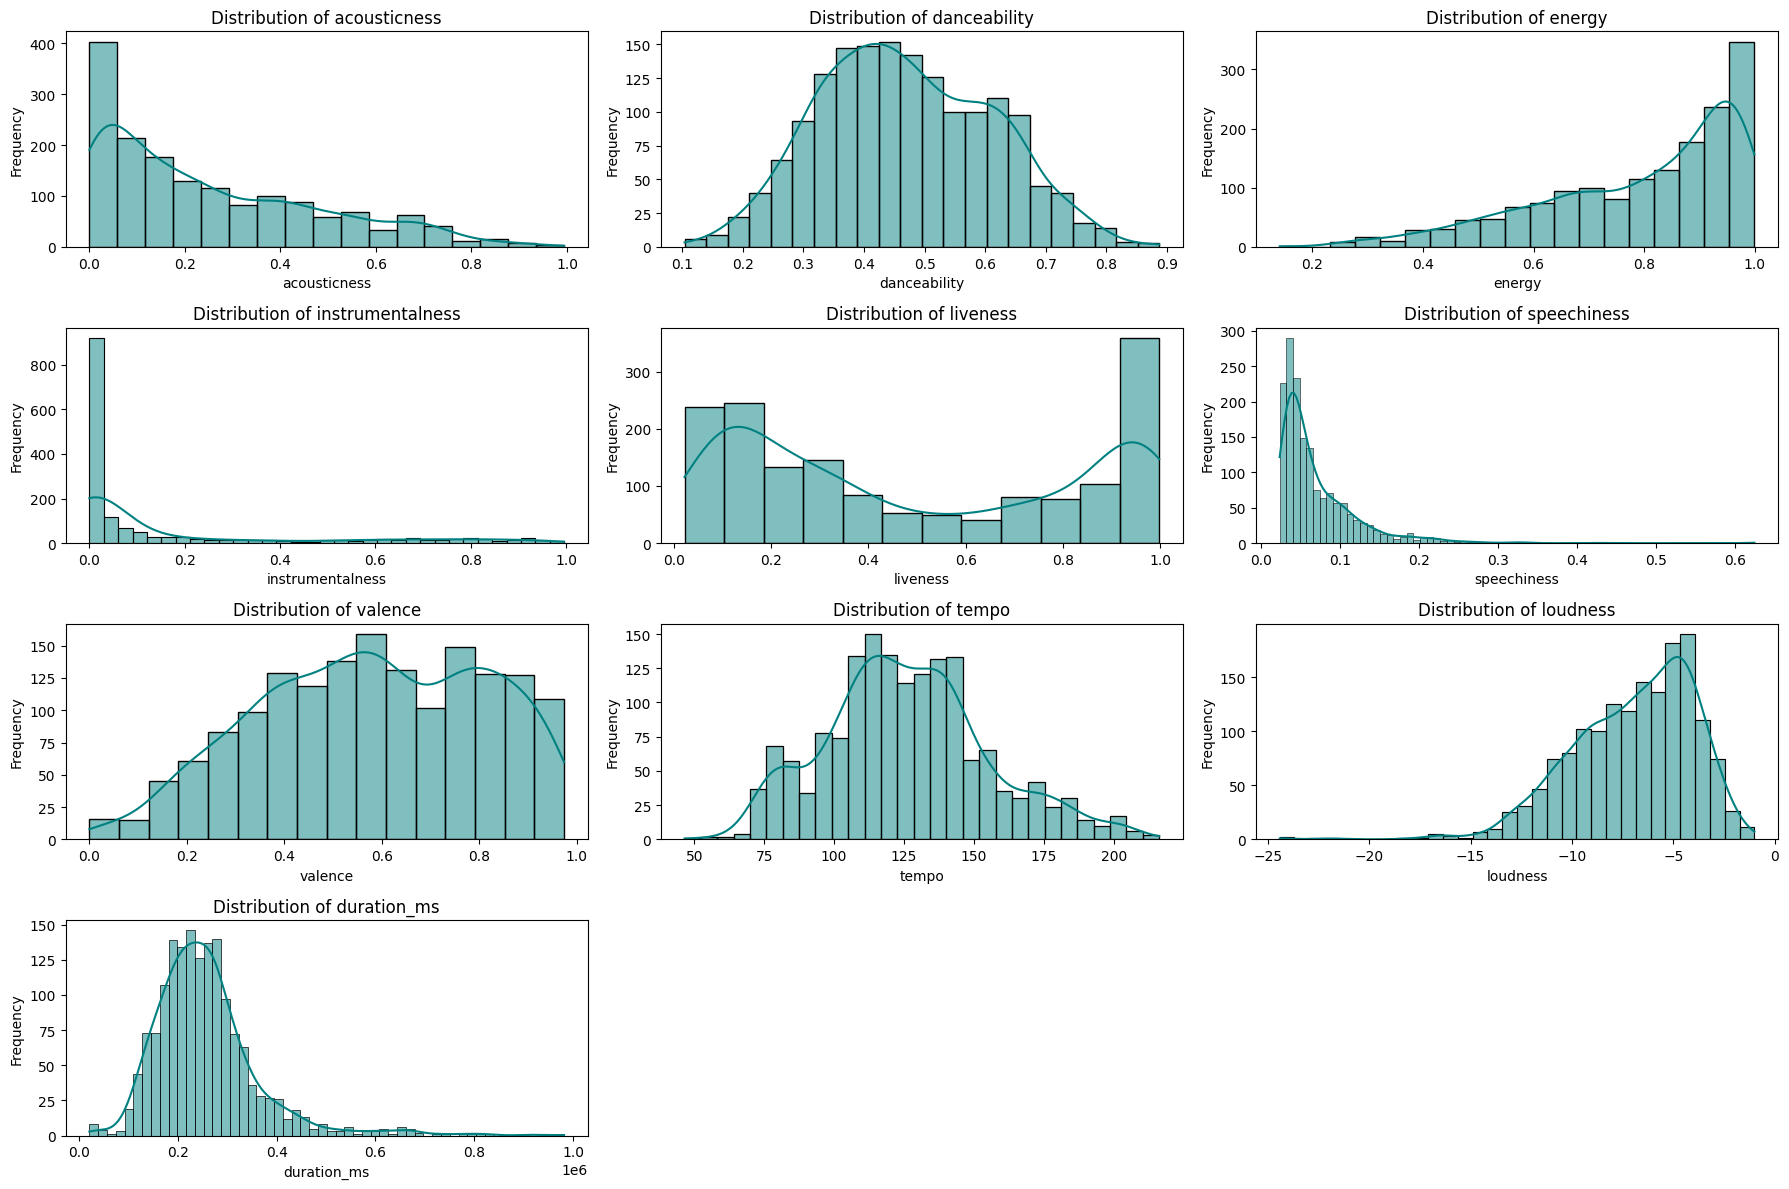

In [73]:
# Plot distributions of key audio features
features_to_plot = [
    "acousticness", "danceability", "energy", "instrumentalness",
    "liveness", "speechiness", "valence", "tempo", "loudness", "duration_ms"
]

plt.figure(figsize=(18, 12))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df_cleaned[feature], kde=True, color="teal")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

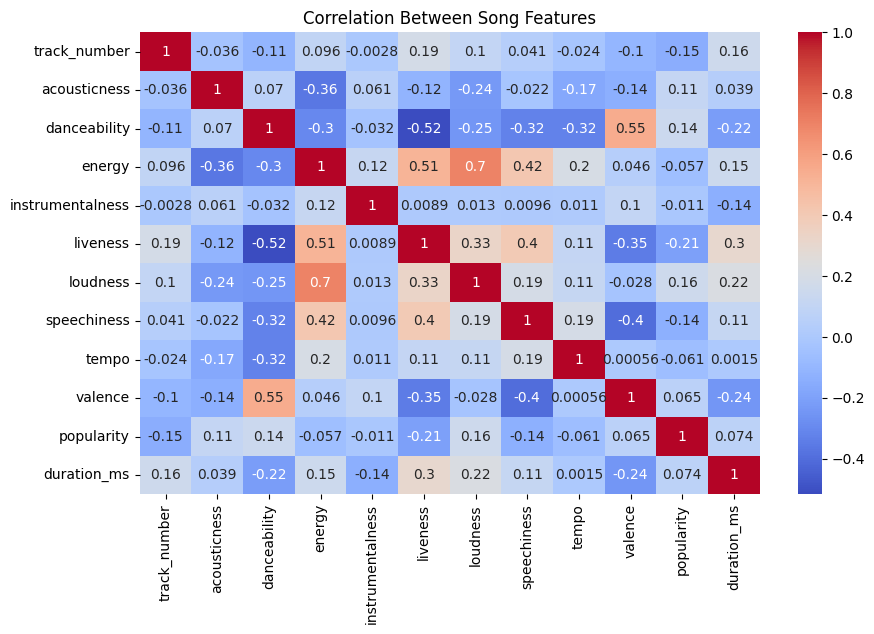

In [74]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Between Song Features")
plt.show()

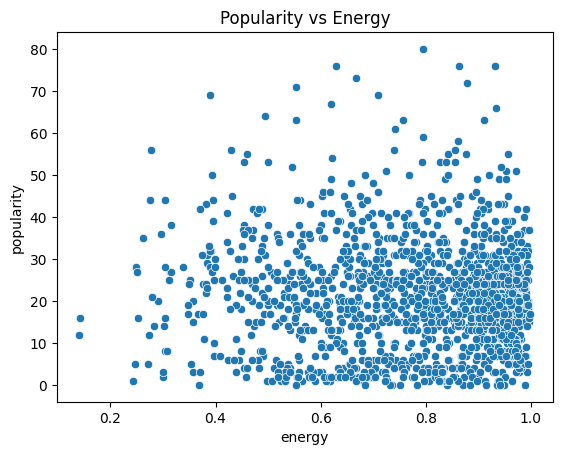

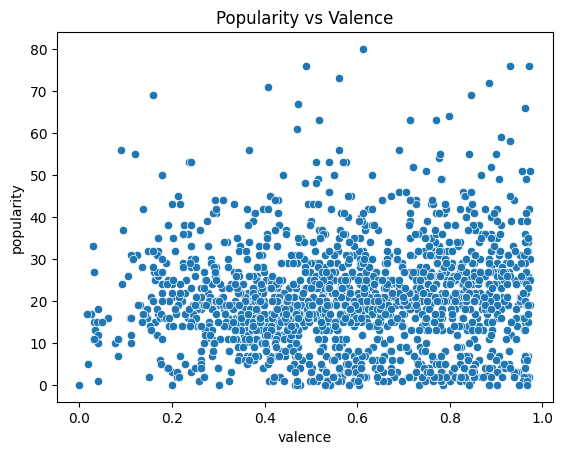

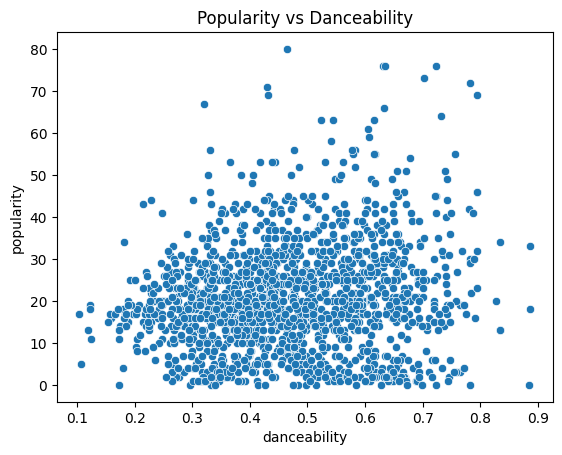

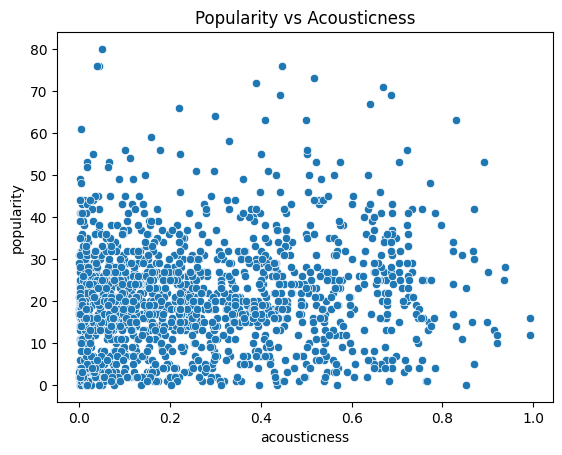

In [75]:
for feature in ["energy", "valence", "danceability", "acousticness"]:
    sns.scatterplot(data=df_cleaned, x=feature, y="popularity")
    plt.title(f"Popularity vs {feature.capitalize()}")
    plt.show()

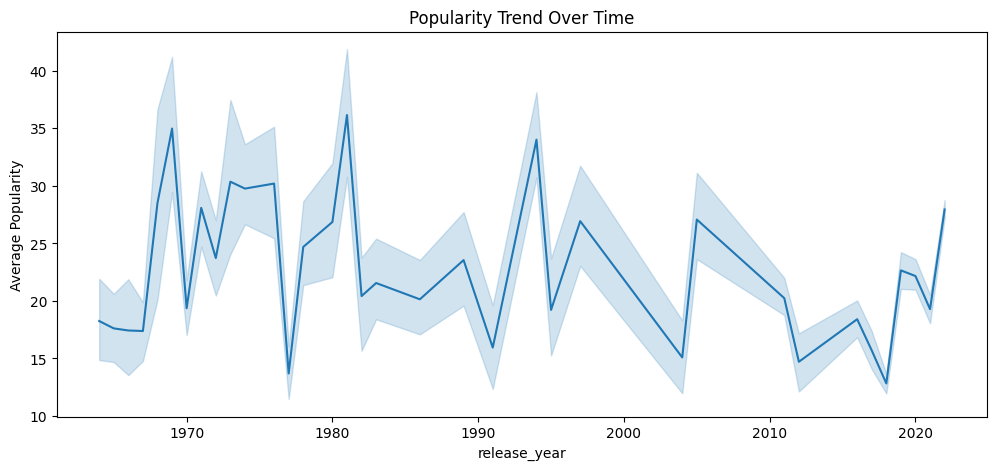

In [76]:
df_cleaned['release_year'] = df_cleaned['release_date'].dt.year

plt.figure(figsize=(12, 5))
sns.lineplot(data=df_cleaned, x='release_year', y='popularity')
plt.title("Popularity Trend Over Time")
plt.ylabel("Average Popularity")
plt.show()

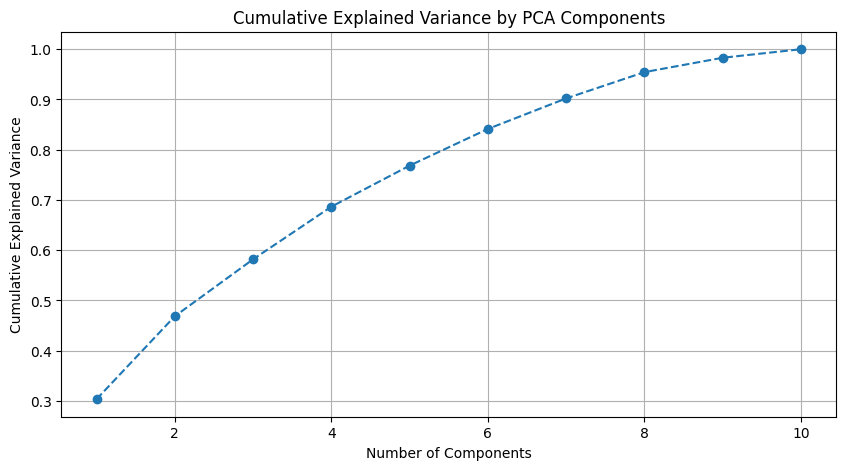

In [77]:
# Select relevant numerical features
features = [
    "acousticness", "danceability", "energy", "instrumentalness",
    "liveness", "loudness", "speechiness", "tempo", "valence", "duration_ms"
]

# Step 1: Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[features])

# Step 2: Apply PCA
pca = PCA(n_components=None)  # Keep all components initially
pca_data = pca.fit_transform(scaled_data)

# Step 3: Plot explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

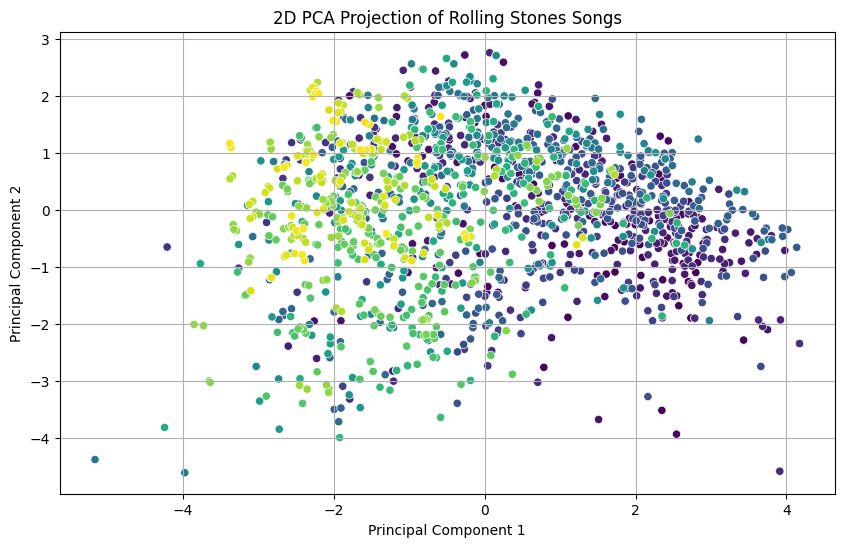

In [78]:
# Reduce to 2D for plotting or clustering
pca_2d = PCA(n_components=2)
pca_components = pca_2d.fit_transform(scaled_data)

# Add PCA components to the DataFrame for visualization
df_cleaned["PCA1"] = pca_components[:, 0]
df_cleaned["PCA2"] = pca_components[:, 1]

# Plot the 2D projection
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", data=df_cleaned, hue="album", legend=False, palette="viridis")
plt.title("2D PCA Projection of Rolling Stones Songs")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

### 4. Perform cluster analysis

a. Identify the right number of clusters

b. Use appropriate clustering algorithms

c. Define each cluster based on the features

In [79]:
# Step 1: Select Features & Scale Them

# Select only numeric features for clustering
features = df_cleaned[[
    "acousticness", "danceability", "energy", "instrumentalness", "liveness",
    "loudness", "speechiness", "tempo", "valence", "duration_ms"
]]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

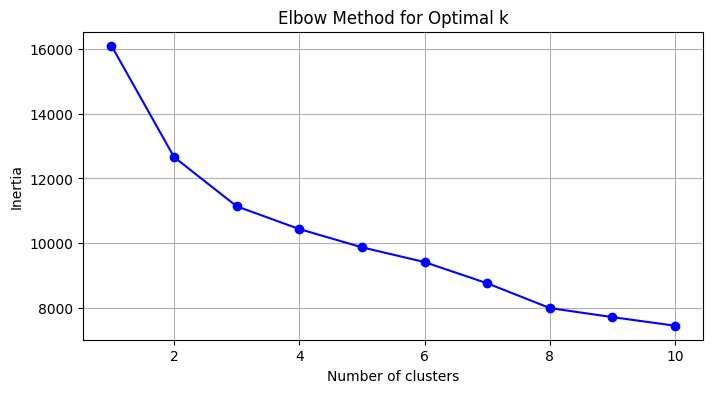

In [80]:
# Step 2: Determine Optimal Number of Clusters (Elbow Method)

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [81]:
# Step 3: Apply KMeans Clustering

# Let's say the elbow is at k=4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cleaned["cluster"] = kmeans.fit_predict(scaled_features)

In [82]:
# Step 4: Analyze Clusters

# Mean values for each cluster
cluster_summary = df_cleaned.groupby("cluster")[features.columns].mean()
print(cluster_summary)

         acousticness  danceability    energy  instrumentalness  liveness  \
cluster                                                                     
0            0.152442      0.406414  0.901076          0.154457  0.705607   
1            0.213671      0.595289  0.767117          0.218140  0.221641   
2            0.222331      0.334611  0.944242          0.172073  0.876151   
3            0.470048      0.468462  0.556231          0.088560  0.300559   

         loudness  speechiness       tempo   valence    duration_ms  
cluster                                                              
0       -5.483144     0.067977  134.027212  0.596701  251928.938144  
1       -7.601935     0.047236  121.991565  0.797724  215257.086207  
2       -5.245570     0.145030  136.456468  0.332118  356045.343396  
3       -9.487246     0.046911  112.864834  0.424447  254597.621302  


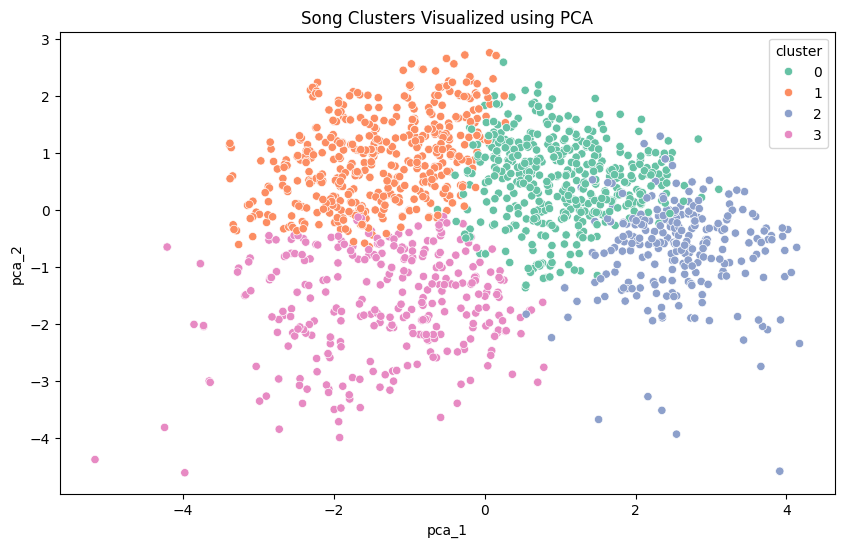

In [83]:
# Step 5: Visualize Clusters with PCA

# Reduce to 2 dimensions for plotting
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

df_cleaned["pca_1"] = pca_components[:, 0]
df_cleaned["pca_2"] = pca_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x="pca_1", y="pca_2", hue="cluster", palette="Set2")
plt.title("Song Clusters Visualized using PCA")
plt.show()

Cluster model helps Spotify (or you) serve the right song, to the right person, at the right moment — without even needing manual labels like "Rock", "Pop", etc.
The data speak for itself! 🎵✨

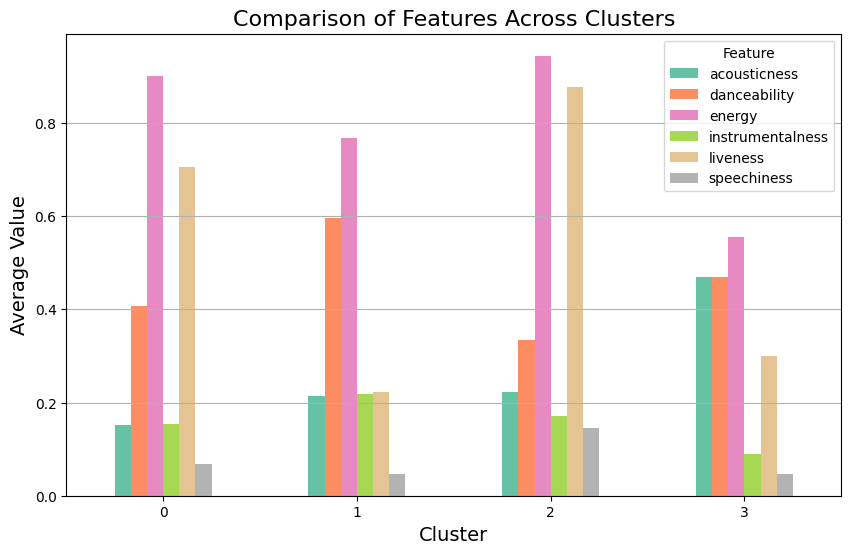

In [84]:
# Select features you want to compare
features_to_plot = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness"]

# Plot
cluster_summary[features_to_plot].plot(kind='bar', figsize=(10,6), colormap='Set2')

plt.title("Comparison of Features Across Clusters", fontsize=16)
plt.ylabel("Average Value", fontsize=14)
plt.xlabel("Cluster", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Feature")
plt.grid(axis='y')
plt.show()

### 1. Different Types of Songs Exist in the Rolling Stones Discography
Cluster | Observations/Characteristics | Interpretation | Possible Name
--------|------------------------------|----------------|--------------
0 | 🔥 Very high energy, high liveness (live performances), loud | Likely live performances, high-energy rock anthems | Rock Concert Anthems
1 | 🎉 High danceability, very happy (high valence), moderate energy | Probably upbeat, feel-good songs | Feel-Good Dance Hits
2 | 🧱 Highest energy, low valence (sad), very long songs | Might be powerful, long rock ballads or live jams | Epic Sad Rock Ballads
3 | 🌙 High acousticness, lower energy, quieter | Possibly acoustic, mellow, or emotional tracks | Acoustic & Chill Songs

### 2. Behavior Patterns for Music Recommendation
- If a user likes a song from Cluster 1 (high danceability), recommend more from Cluster 1 for dance playlists!
- If a user likes live concerts / anthems (Cluster 0), suggest other high-energy tracks.

→ Personalized playlists can be created based on clusters rather than just genre.

### 3. Understand Mood and Listening Context
- Cluster 2 songs → high energy but low valence → good for workout or intense moods.
- Cluster 3 songs → low energy → good for relaxing / study / chill playlists.

Spotify or other apps can auto-recommend songs based on time of day, user's activity, or current mood!

### 4. Business / Product Insights
- The Rolling Stones' portfolio has diverse song types — it’s not just "all rock"; there are mellow and danceable tracks too.
- Marketing teams can push different albums based on cluster dominance.

Example:
- If promoting a lively festival → push songs from Cluster 0.
- If promoting a chill evening → promote songs from Cluster 3.